1- The Logistic Regression algorithm is a supervised machine learning method used primarily for classification problems, not traditional regression. It predicts the probability of a categorical outcome (e.g., whether an email is spam or not, a tumor is malignant or benign) by fitting data to an S-shaped logistic function


2- How Logistic Regression Works
The algorithm follows a two-step process to make predictions:  

A- Linear Combination: It first calculates a linear combination of the input features (independent variables) and their corresponding weights (coefficients), similar to linear regression.

B- Sigmoid Function Transformation: The resulting value of \(z\) (which can range from negative infinity to positive infinity) is then passed through the sigmoid function (or logistic function). This function maps the output to a probability value between 0 and 1.\(\sigma (z)=\frac{1}{1+e^{-z}}\)

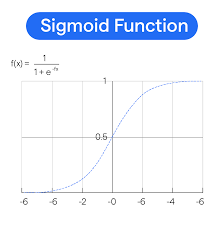

C- Decision Boundary: To classify the observation into a discrete class, a threshold (commonly 0.5) 
is applied to the probability.If the calculated => (probability is  > 0.5  ) the prediction is class 1 (e.g., "spam", "diseased").
If the => (probability is  <  0.5 ) , the prediction is class 0 (e.g., "not spam", "not diseased").

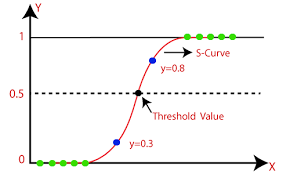

update weights and bias in class model function fit

1- update weights 
weights_new = weights_old - learning rate * Gradient with respect to Weight

2- bias weights 
bias_new = bias_old - learning rate * Gradient with respect to Bia

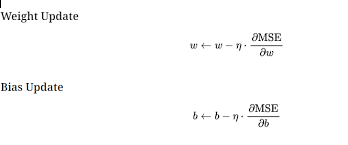

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr =lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_sample, n_feature = X.shape
        self.weights = np.zeros(n_feature)
        self.bias = 0

        #Gradiant descent
        for i in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predict = self.sigmoid(linear_model)
            
            dw = (1 / n_sample) * np.dot(X.T, (y_predict - y))
            db = (1 / n_sample) * np.sum(y_predict - y)

            #update weights and bias
            self.weights -=self.lr * dw
            self.bias -=self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predict = self.sigmoid(linear_model)
        y_predict_class = [1 if i > 0.5 else 0 for i in y_predict]
        return y_predict_class

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [3]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [4]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

In [9]:
regressor = LogisticRegression(lr=0.0001, n_iter=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [10]:
print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088
